In [75]:
import numpy as np
import pandas as pd

# Generate 10,000 ages with a normal distribution
np.random.seed(42)  # For reproducibility
ages = np.random.normal(loc=35, scale=15, size=10000)

# Remove ages below the threshold (e.g., 20)
ages = ages[ages >= 10]

# Create a DataFrame
df = pd.DataFrame({'Age': ages})
df.head()

,Age
0,42.450712
1,32.926035
2,44.715328
3,57.845448
4,31.487699


In [76]:
# Generate Resting Heart Rate (RHR) with slight correlation to age
np.random.seed(42)  # For reproducibility
rhr = 70 + (ages - 35) * 0.5 + np.random.normal(loc=0, scale=4, size=len(ages))  # Base RHR with age correlation
rhr = np.clip(rhr, 40, 120)  # Clip to realistic range

# Add RHR to the DataFrame
df['Resting Heart Rate'] = rhr
df.head()

,Age,Resting Heart Rate
0,42.450712,75.712213
1,32.926035,68.409961
2,44.715328,77.448418
3,57.845448,87.514843
4,31.487699,67.307236


In [77]:
from scipy.stats import truncnorm

# Generate Weight with a realistic distribution for a working-class population
np.random.seed(42)  # For reproducibility

# Define the bounds for the truncated normal distribution
lower_bound, upper_bound = 40, 150
mean, std_dev = 68, 16

# Generate weights for adults using a truncated normal distribution
adult_weights = truncnorm(
    (lower_bound - mean) / std_dev, (upper_bound - mean) / std_dev, loc=mean, scale=std_dev
).rvs(len(ages))

# Adjust weights for children (e.g., Age < 18)
child_indices = df['Age'] < 18
child_weights = truncnorm(
    (lower_bound - 50) / 10, (upper_bound - 50) / 10, loc=50, scale=10
).rvs(child_indices.sum())

# Combine weights for adults and children
weights = adult_weights
weights[child_indices] = child_weights

# Add Weight to the DataFrame
df['Weight'] = weights
df.head()

,Age,Resting Heart Rate,Weight
0,42.450712,75.712213,63.929690
1,32.926035,68.409961,94.743998
2,44.715328,77.448418,78.428554
3,57.845448,87.514843,72.666941
4,31.487699,67.307236,53.943503


In [78]:
# Generate Mean Blood Sugar (MBS) correlated to weight
np.random.seed(42)  # For reproducibility
mean_blood_sugar = 100 + (df['Weight'] - 68) * 0.5 + np.random.normal(loc=0, scale=5, size=len(df))  # Base MBS with weight correlation
mean_blood_sugar = np.clip(mean_blood_sugar, 5, 200)  # Clip to realistic range

# Add Mean Blood Sugar to the DataFrame
df['Mean Blood Sugar'] = mean_blood_sugar
df.head()

,Age,Resting Heart Rate,Weight,Mean Blood Sugar
0,42.450712,75.712213,63.929690,100.448416
1,32.926035,68.409961,94.743998,112.680677
2,44.715328,77.448418,78.428554,108.452719
3,57.845448,87.514843,72.666941,109.948620
4,31.487699,67.307236,53.943503,91.800985


In [79]:
# Generate Blood Pressure (BP) correlated to Mean Blood Sugar
np.random.seed(42)  # For reproducibility
blood_pressure = 110 + (df['Mean Blood Sugar'] - 100) * 0.3 + np.random.normal(loc=0, scale=8, size=len(df))  # Base BP with MBS correlation
blood_pressure = np.clip(blood_pressure, 80, 200)  # Clip to realistic range

# Add Blood Pressure to the DataFrame
df['Blood Pressure'] = blood_pressure
df.head()

,Age,Resting Heart Rate,Weight,Mean Blood Sugar,Blood Pressure
0,42.450712,75.712213,63.929690,100.448416,114.108238
1,32.926035,68.409961,94.743998,112.680677,112.698089
2,44.715328,77.448418,78.428554,108.452719,117.717324
3,57.845448,87.514843,72.666941,109.948620,125.168825
4,31.487699,67.307236,53.943503,91.800985,105.667068


In [80]:
# Generate Cholesterol Level correlated to Mean Blood Sugar
np.random.seed(42)  # For reproducibility
cholesterol = 180 + (df['Mean Blood Sugar'] - 100) * 0.4 + np.random.normal(loc=0, scale=10, size=len(df))  # Base cholesterol with MBS correlation
cholesterol = np.clip(cholesterol, 100, 300)  # Clip to realistic range

# Add Cholesterol Level to the DataFrame
df['Cholesterol'] = cholesterol
df.head()

,Age,Resting Heart Rate,Weight,Mean Blood Sugar,Blood Pressure,Cholesterol
0,42.450712,75.712213,63.929690,100.448416,114.108238,185.146508
1,32.926035,68.409961,94.743998,112.680677,112.698089,183.689628
2,44.715328,77.448418,78.428554,108.452719,117.717324,189.857973
3,57.845448,87.514843,72.666941,109.948620,125.168825,199.209746
4,31.487699,67.307236,53.943503,91.800985,105.667068,174.378860


In [81]:
# Generate Hours of Training per Week (uncorrelated)
np.random.seed(42)  # For reproducibility
hours_training = np.random.normal(loc=1.5, scale=1.0, size=len(df))  # Mean 1.5 hours, std deviation 1 hour
hours_training = np.clip(hours_training, 0, None)  # Clip to ensure no negative values

# Add Hours of Training to the DataFrame
df['Hours of Training'] = hours_training
df.head()

,Age,Resting Heart Rate,Weight,Mean Blood Sugar,Blood Pressure,Cholesterol,Hours of Training
0,42.450712,75.712213,63.929690,100.448416,114.108238,185.146508,1.996714
1,32.926035,68.409961,94.743998,112.680677,112.698089,183.689628,1.361736
2,44.715328,77.448418,78.428554,108.452719,117.717324,189.857973,2.147689
3,57.845448,87.514843,72.666941,109.948620,125.168825,199.209746,3.023030
4,31.487699,67.307236,53.943503,91.800985,105.667068,174.378860,1.265847


In [82]:
# Generate Height with a realistic distribution for a working-class population
np.random.seed(42)  # For reproducibility
height = np.random.normal(loc=175, scale=10, size=len(df))  # Mean height of 170cm with std deviation of 10cm

# Introduce skewness towards the lower end
height = height - np.random.exponential(scale=5, size=len(df))  # Subtract exponential values to skew lower

# Clip to a realistic range (e.g., 140cm to 210cm)
height = np.clip(height, 140, 210)

# Add Height to the DataFrame
df['Height'] = height
df.head()

,Age,Resting Heart Rate,Weight,Mean Blood Sugar,Blood Pressure,Cholesterol,Hours of Training,Height
0,42.450712,75.712213,63.929690,100.448416,114.108238,185.146508,1.996714,176.851082
1,32.926035,68.409961,94.743998,112.680677,112.698089,183.689628,1.361736,170.935972
2,44.715328,77.448418,78.428554,108.452719,117.717324,189.857973,2.147689,180.669607
3,57.845448,87.514843,72.666941,109.948620,125.168825,199.209746,3.023030,174.401333
4,31.487699,67.307236,53.943503,91.800985,105.667068,174.378860,1.265847,170.068271


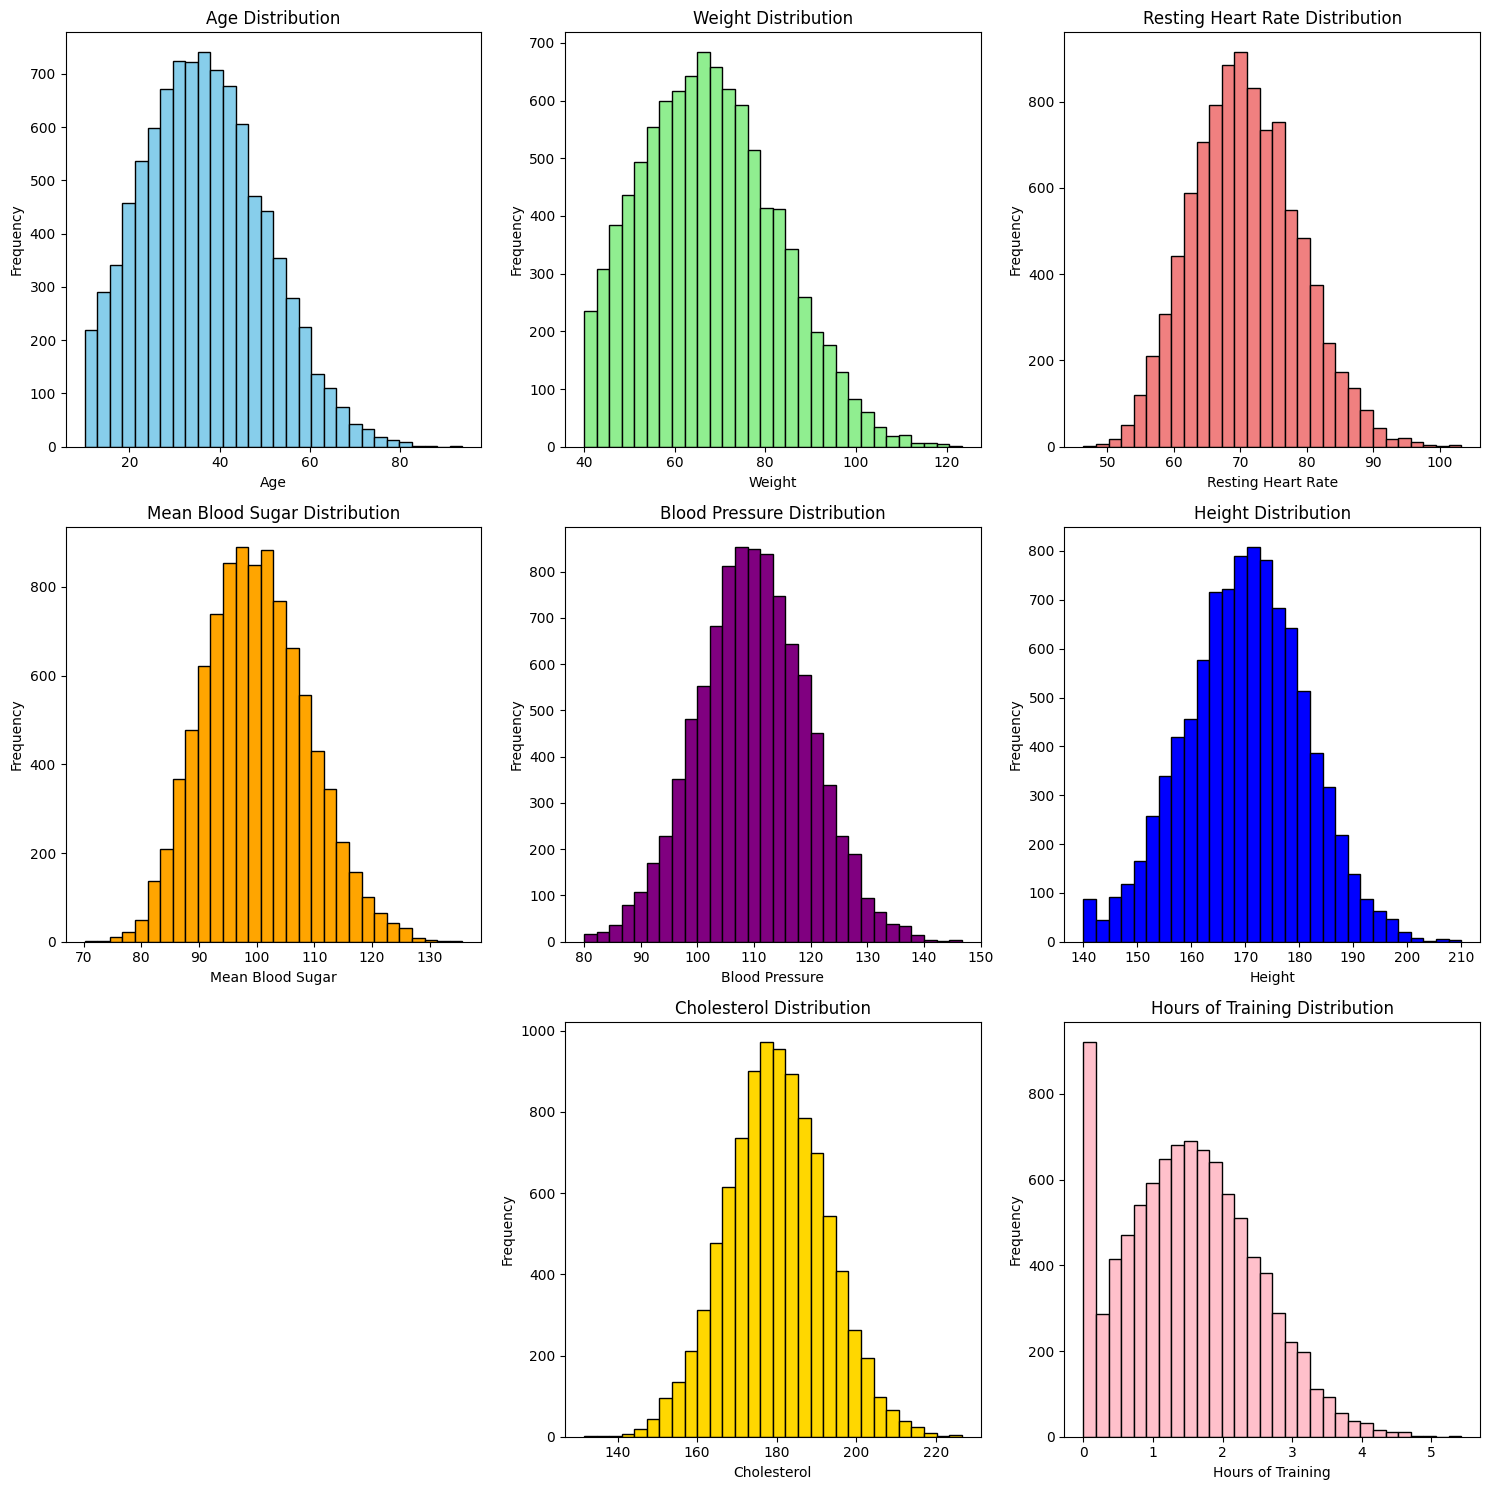

In [83]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a 3x3 grid for subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(3, 3, figure=fig)

# Age distribution
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(ages, bins=30, color='skyblue', edgecolor='black')
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')

# Weight distribution
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(df['Weight'], bins=30, color='lightgreen', edgecolor='black')
ax2.set_title('Weight Distribution')
ax2.set_xlabel('Weight')
ax2.set_ylabel('Frequency')

# Resting Heart Rate distribution
ax3 = fig.add_subplot(gs[0, 2])
ax3.hist(df['Resting Heart Rate'], bins=30, color='lightcoral', edgecolor='black')
ax3.set_title('Resting Heart Rate Distribution')
ax3.set_xlabel('Resting Heart Rate')
ax3.set_ylabel('Frequency')

# Mean Blood Sugar distribution
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist(df['Mean Blood Sugar'], bins=30, color='orange', edgecolor='black')
ax4.set_title('Mean Blood Sugar Distribution')
ax4.set_xlabel('Mean Blood Sugar')
ax4.set_ylabel('Frequency')

# Blood Pressure distribution
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(df['Blood Pressure'], bins=30, color='purple', edgecolor='black')
ax5.set_title('Blood Pressure Distribution')
ax5.set_xlabel('Blood Pressure')
ax5.set_ylabel('Frequency')

# Height distribution
ax6 = fig.add_subplot(gs[1, 2])
ax6.hist(df['Height'], bins=30, color='blue', edgecolor='black')
ax6.set_title('Height Distribution')
ax6.set_xlabel('Height')
ax6.set_ylabel('Frequency')

# Cholesterol distribution
ax7 = fig.add_subplot(gs[2, 1])
ax7.hist(df['Cholesterol'], bins=30, color='gold', edgecolor='black')
ax7.set_title('Cholesterol Distribution')
ax7.set_xlabel('Cholesterol')
ax7.set_ylabel('Frequency')

# Hours of Training distribution
ax8 = fig.add_subplot(gs[2, 2])
ax8.hist(df['Hours of Training'], bins=30, color='pink', edgecolor='black')
ax8.set_title('Hours of Training Distribution')
ax8.set_xlabel('Hours of Training')
ax8.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

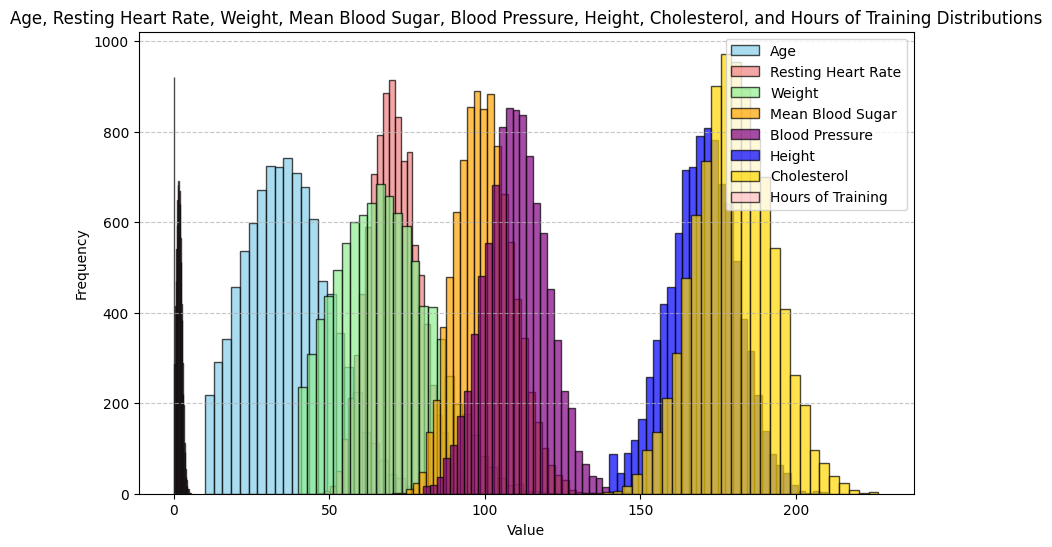

In [84]:
# Plot all eight distributions on the same axes
plt.figure(figsize=(10, 6))

# Age distribution
plt.hist(ages, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Age')

# Resting Heart Rate distribution
plt.hist(rhr, bins=30, color='lightcoral', edgecolor='black', alpha=0.7, label='Resting Heart Rate')

# Weight distribution
plt.hist(df['Weight'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7, label='Weight')

# Mean Blood Sugar distribution
plt.hist(df['Mean Blood Sugar'], bins=30, color='orange', edgecolor='black', alpha=0.7, label='Mean Blood Sugar')

# Blood Pressure distribution
plt.hist(df['Blood Pressure'], bins=30, color='purple', edgecolor='black', alpha=0.7, label='Blood Pressure')

# Height distribution
plt.hist(df['Height'], bins=30, color='blue', edgecolor='black', alpha=0.7, label='Height')

# Cholesterol distribution
plt.hist(df['Cholesterol'], bins=30, color='gold', edgecolor='black', alpha=0.7, label='Cholesterol')

# Hours of Training distribution
plt.hist(df['Hours of Training'], bins=30, color='pink', edgecolor='black', alpha=0.7, label='Hours of Training')

plt.title('Age, Resting Heart Rate, Weight, Mean Blood Sugar, Blood Pressure, Height, Cholesterol, and Hours of Training Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Create a new DataFrame for z-score standardized values
df_normalized = df.copy()

# Z-score standardization for Mean Blood Sugar
df_normalized['Mean Blood Sugar'] = (
    df['Mean Blood Sugar'] - df['Mean Blood Sugar'].mean()
) / df['Mean Blood Sugar'].std()

# Correct BMI calculation and apply z-score standardization
df_normalized['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2
df_normalized['BMI'] = (
    df_normalized['BMI'] - df_normalized['BMI'].mean()
) / df_normalized['BMI'].std()

# Z-score standardization for Age
df_normalized['Age'] = (
    df['Age'] - df['Age'].mean()
) / df['Age'].std()

# Z-score standardization for Hours of Training
df_normalized['Hours of Training'] = (
    df['Hours of Training'] - df['Hours of Training'].mean()
) / df['Hours of Training'].std()

# Calculate diabetes probability based on weighted sum of z-score standardized features
diabetes_probability = (
    0.6 * df_normalized['Mean Blood Sugar'] +
    0.1 * df_normalized['BMI'] +
    0.2 * df_normalized['Age'] +
    0.1 * np.random.choice([0, 1], size=len(df_normalized), p=[0.9, 0.1]) +
    -0.5 * df_normalized['Hours of Training']
)

# Normalize probabilities to range [0, 1]
diabetes_probability = (diabetes_probability - diabetes_probability.min()) / (
    diabetes_probability.max() - diabetes_probability.min()
)

# Add noise
diabetes_probability += np.random.normal(0, 0.05, size=len(df_normalized))
diabetes_probability = diabetes_probability.clip(0, 1)  # Ensure within [0, 1]

# Convert to binary (Yes/No) based on threshold
diabetes_binary = (diabetes_probability > 0.6).astype(int)  

# Add to normalized DataFrame
df_normalized['Diabetes'] = diabetes_binary
df['Diabetes'] = diabetes_binary
df_normalized.head()

,Age,Resting Heart Rate,Weight,Mean Blood Sugar,Blood Pressure,Cholesterol,Hours of Training,Height,BMI,Diabetes
0,0.433164,75.712213,63.929690,0.063889,114.108238,185.146508,0.494200,176.851082,-0.542888,0
1,-0.269562,68.409961,94.743998,1.420636,112.698089,183.689628,-0.176858,170.935972,1.414002,0
2,0.600247,77.448418,78.428554,0.951690,117.717324,189.857973,0.653753,180.669607,0.042780,0
3,1.568981,87.514843,72.666941,1.117609,125.168825,199.209746,1.578832,174.401333,0.020561,0
4,-0.375682,67.307236,53.943503,-0.895246,105.667068,174.378860,-0.278196,170.068271,-0.835107,0


In [86]:
# Calculate the percentage of entries with diabetes
percentage_diabetes = (df_normalized['Diabetes'].mean()) * 100
print(f"Percentage of entries with diabetes: {percentage_diabetes:.2f}%")

Percentage of entries with diabetes: 10.88%


In [87]:
# Filter and display all entries with Diabetes = 1
diabetes_positive = df[df_normalized['Diabetes'] == 1]
diabetes_positive.head(10)

,Age,Resting Heart Rate,Weight,Mean Blood Sugar,Blood Pressure,Cholesterol,Hours of Training,Height,Diabetes
11,28.014054,64.644108,98.359049,112.850876,110.129425,180.483053,1.034270,165.430689,1
25,40.635470,73.261425,81.113802,107.111514,113.020835,183.953831,1.610923,175.077111,1
34,38.132954,74.856657,97.416657,118.821053,122.226675,195.753870,2.322545,181.429349,1
43,28.090418,65.340794,89.746637,109.367800,110.401510,180.736083,1.198896,163.413322,1
45,40.154274,69.697760,75.306515,100.054036,104.257457,172.823172,0.780156,167.402987,1
50,50.464993,79.028832,98.283630,116.762235,117.621342,189.945734,1.824084,176.094650,1
52,22.411737,60.998181,93.137894,109.184337,107.339925,176.904515,0.823078,163.711830,1
69,58.469655,79.154348,103.819106,114.683954,109.244228,179.422384,0.854880,158.988090,1
76,57.168411,81.432394,80.378500,106.624485,112.683722,183.520265,1.587047,175.727111,1
88,29.118378,64.940148,87.772562,107.237480,107.933162,177.597390,0.970240,167.217005,1


In [88]:
# Calculate averages for diabetics and non-diabetics
diabetic_means = df[df_normalized['Diabetes'] == 1].mean()
non_diabetic_means = df[df_normalized['Diabetes'] == 0].mean()

# Compare key features
print("Diabetics:")
print(diabetic_means[['Mean Blood Sugar', 'Weight', 'Height', 'Age', 'Hours of Training']])
print("\nNon-Diabetics:")
print(non_diabetic_means[['Mean Blood Sugar', 'Weight', 'Height', 'Age', 'Hours of Training']])

Diabetics:
Mean Blood Sugar     109.119830
Weight                90.610099
Height               165.185105
Age                   44.078941
Hours of Training      1.108202
dtype: float64

Non-Diabetics:
Mean Blood Sugar      98.742938
Weight                64.963274
Height               170.519997
Age                   35.663701
Hours of Training      1.580491
dtype: float64


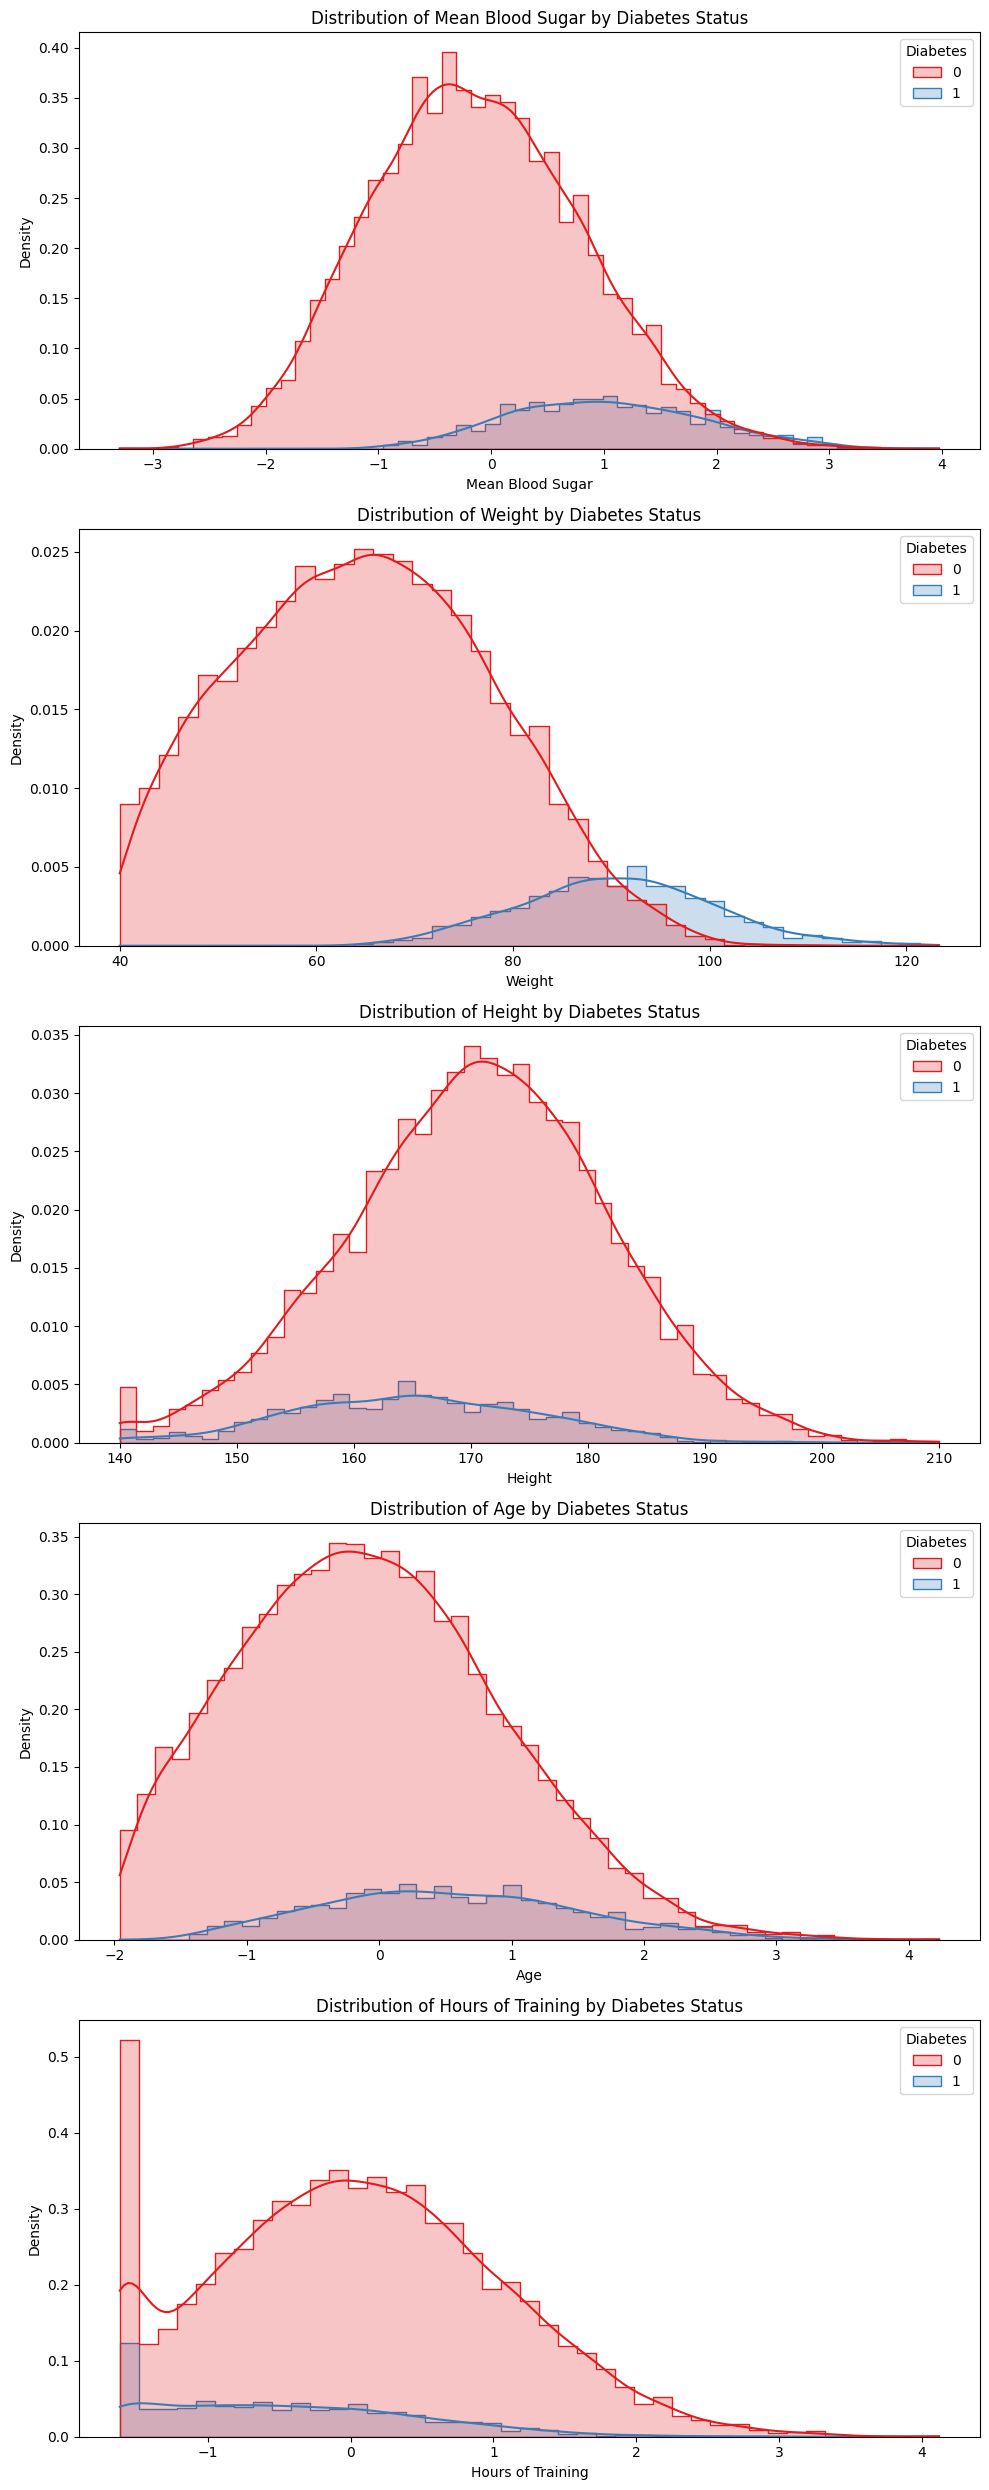

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables to plot
grouped_columns = ['Mean Blood Sugar', 'Weight', 'Height', 'Age', 'Hours of Training']

# Create subplots
fig, axes = plt.subplots(len(grouped_columns), 1, figsize=(10, 5 * len(grouped_columns)))

for i, column in enumerate(grouped_columns):
    sns.histplot(
        data=df_normalized, x=column, hue='Diabetes', kde=True, ax=axes[i],
        palette='Set1', element='step', stat='density'
    )
    axes[i].set_title(f'Distribution of {column} by Diabetes Status')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 827, number of negative: 6780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 7607, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.108716 -> initscore=-2.103928
[LightGBM] [Info] Start training from score -2.103928
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1694
           1       0.75      0.73      0.74       208

    accuracy                           0.94      1902
   macro avg       0.86      0.85      0.85      1902
weighted avg       0.94      0.94      0.94      1902

Classification Re

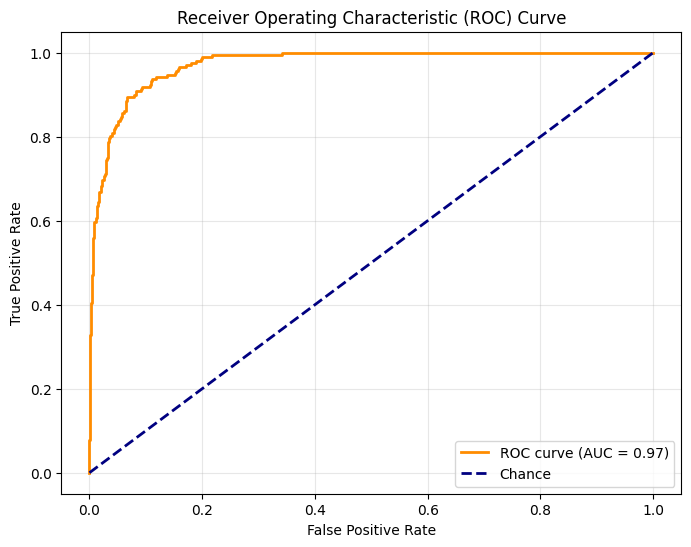

In [90]:
# Prepare the data for classification using all columns except 'Diabetes'
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LightGBM classifier
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
lgbm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict probabilities for the test set
y_prob = lgbm_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Mean Squared Error: 0.02


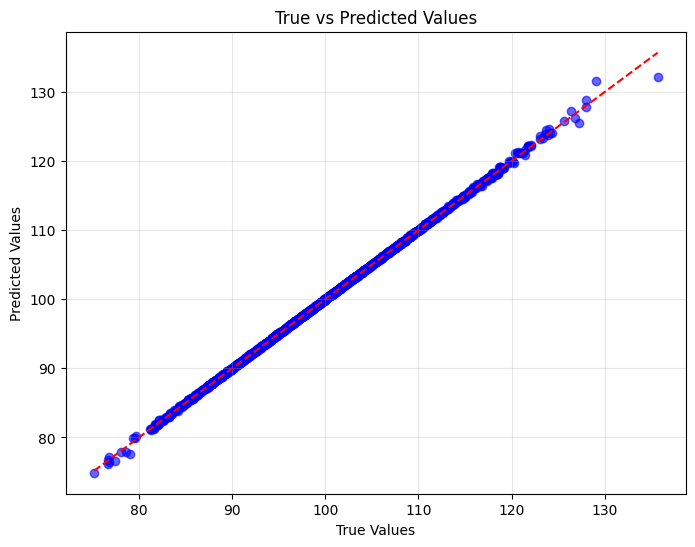

In [91]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data for regression using all columns except 'Diabetes'
X = df.drop(columns=['Diabetes'])
y = df['Mean Blood Sugar']  # Example target variable for regression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost regressor
xgb_regressor = XGBRegressor(random_state=42)
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.grid(alpha=0.3)
plt.show()

In [92]:
#ROC curve for the above



c:\Users\beego\anaconda3\envs\AppML\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:08:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


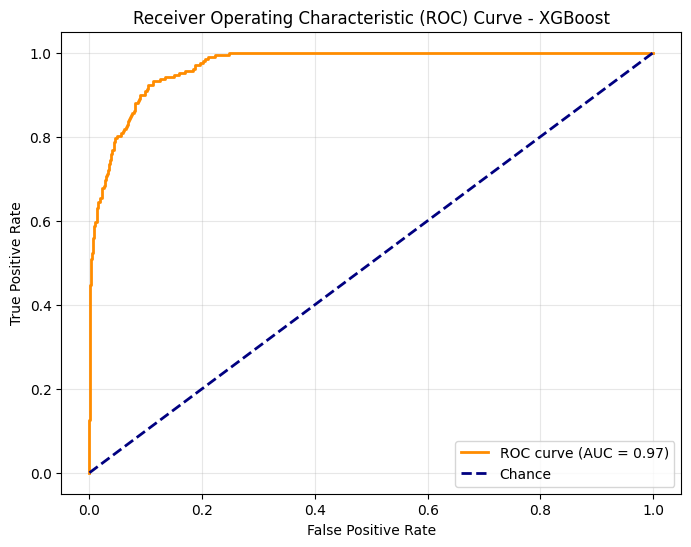

In [93]:
from xgboost import XGBClassifier

# Prepare the data for classification using all columns except 'Diabetes'
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

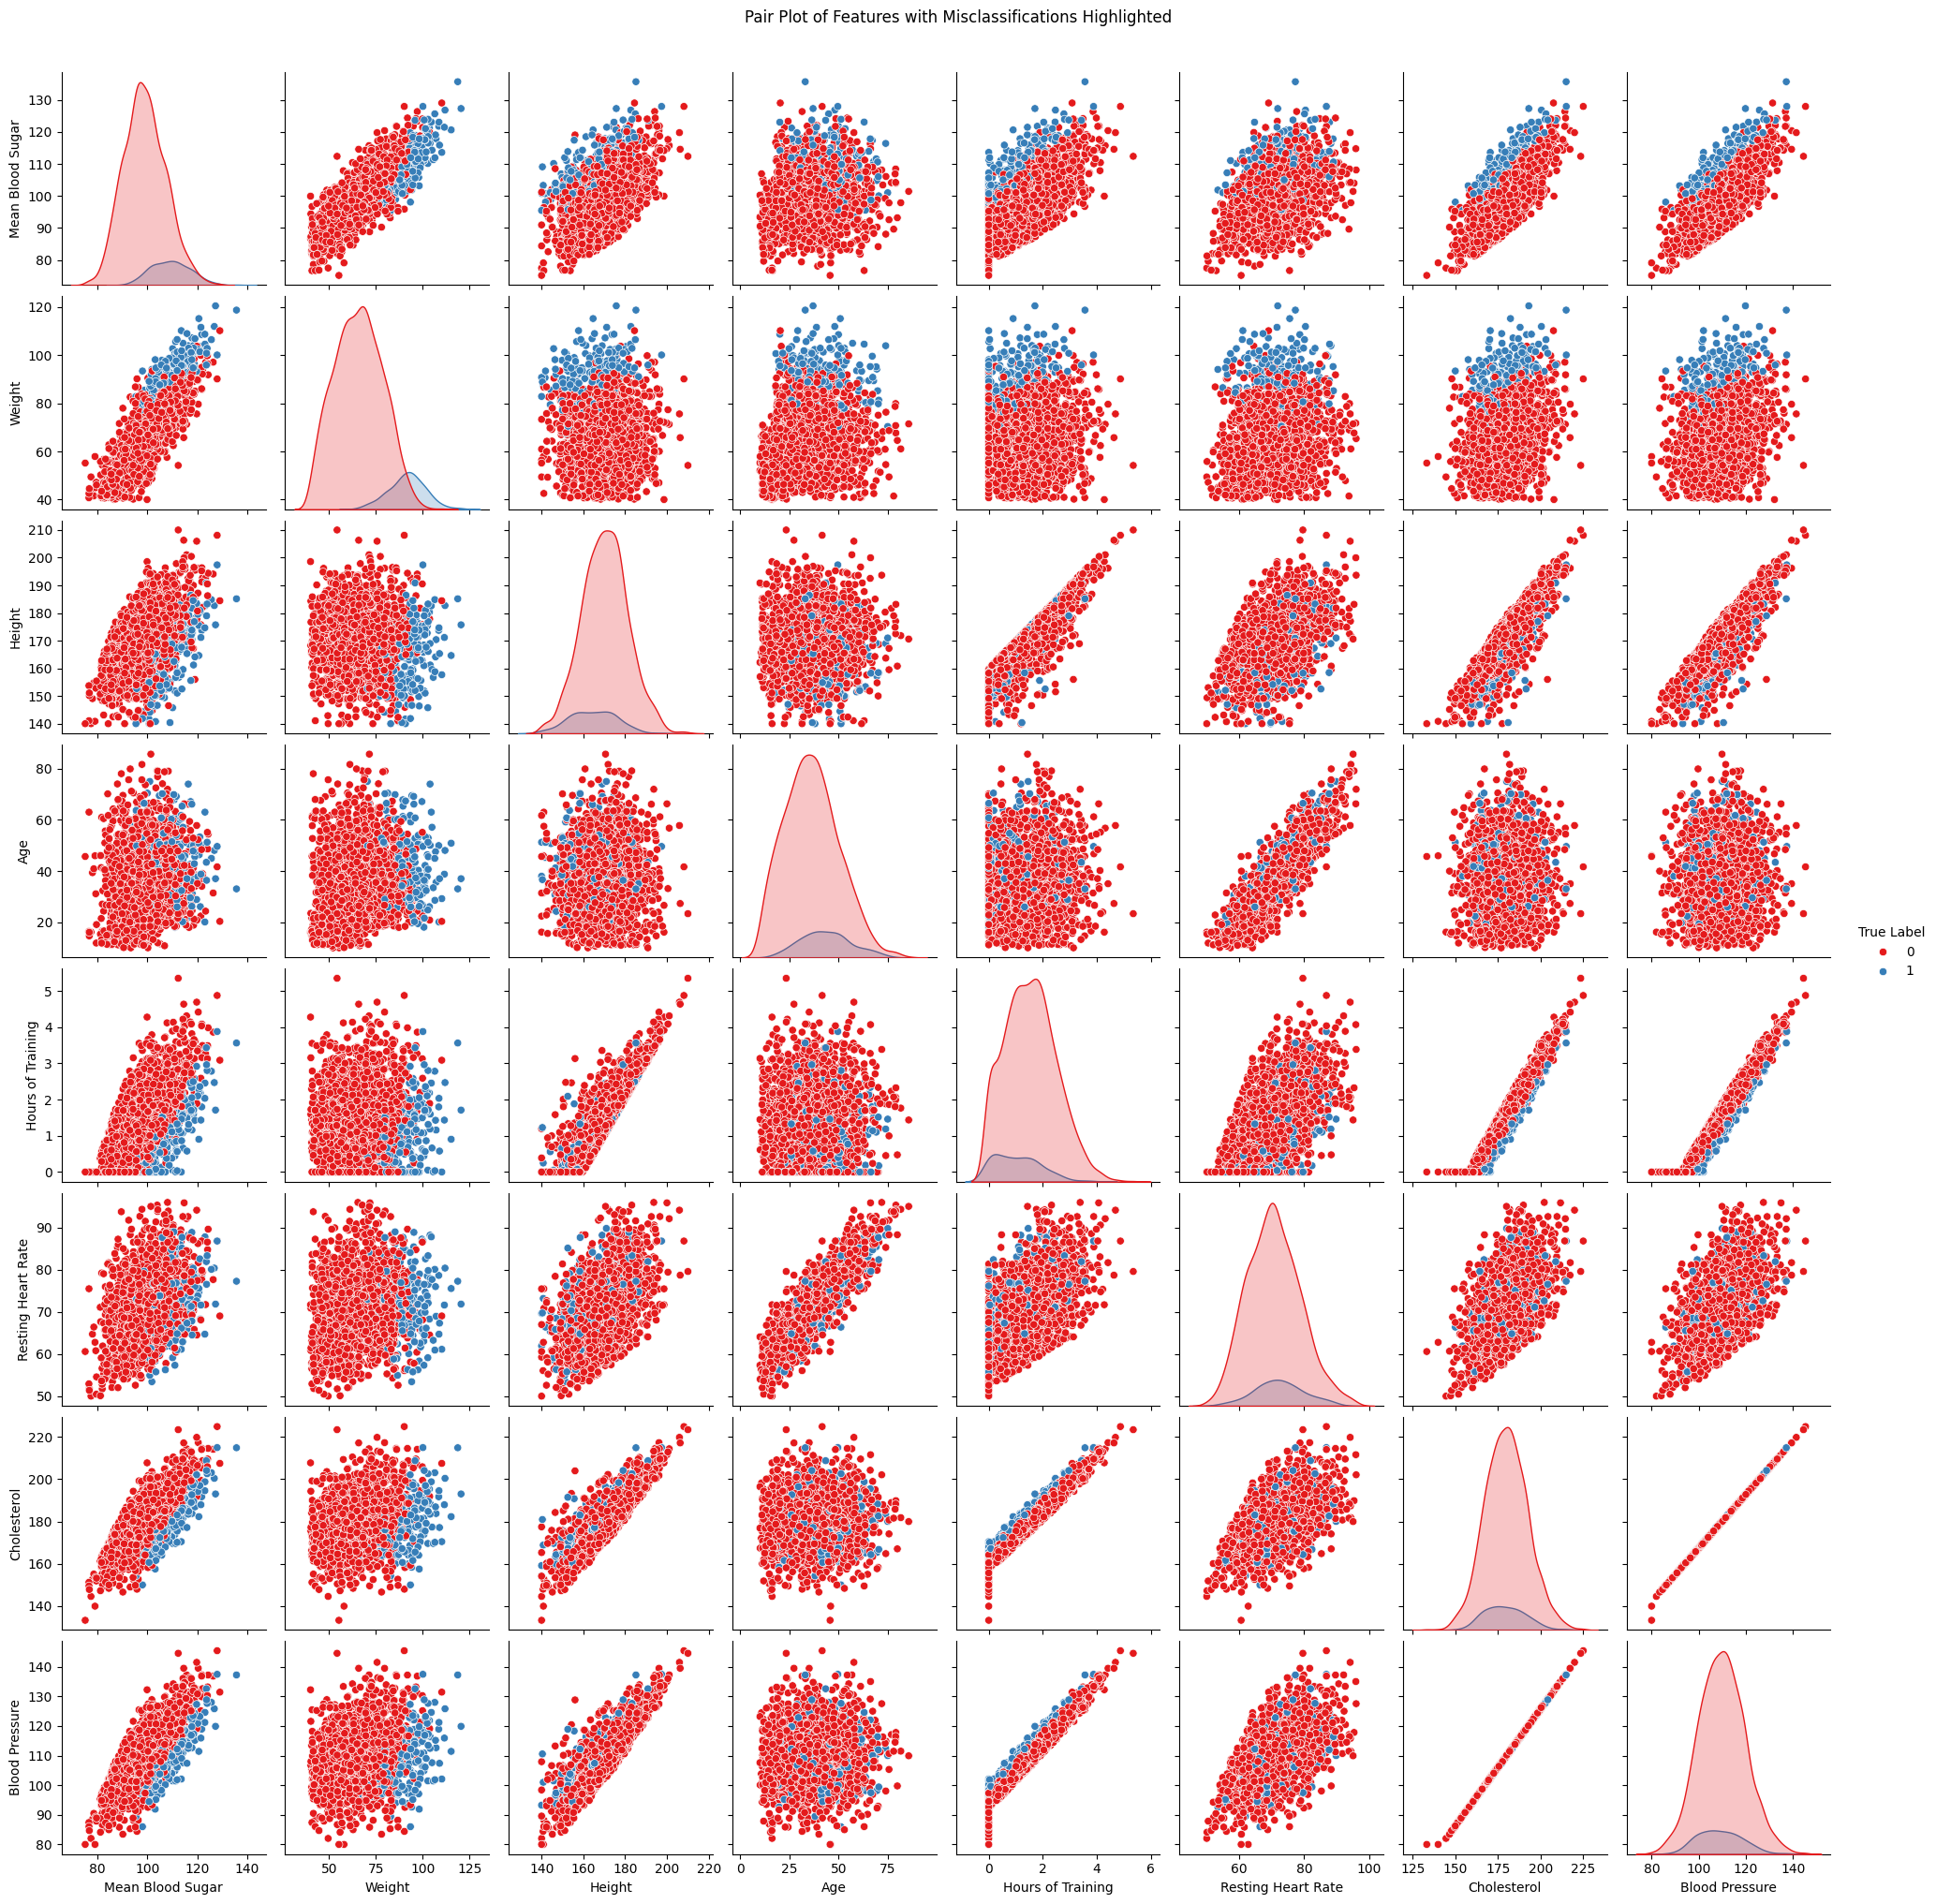

In [97]:
# Add predictions to the test set
X_test_with_predictions = X_test.copy()
X_test_with_predictions['True Label'] = y_test
X_test_with_predictions['Predicted Label'] = y_pred

# Identify misclassified entries
misclassified = X_test_with_predictions[X_test_with_predictions['True Label'] != X_test_with_predictions['Predicted Label']]

# Visualize misclassified entries
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Pair plot to visualize misclassifications
sns.pairplot(
    X_test_with_predictions,
    vars=['Mean Blood Sugar', 'Weight', 'Height', 'Age', 'Hours of Training', 'Resting Heart Rate', 'Cholesterol', 'Blood Pressure'],  # Replace with relevant features
    hue='True Label',
    palette='Set1',
    diag_kind='kde'
)
plt.suptitle('Pair Plot of Features with Misclassifications Highlighted', y=1.02)
plt.show()

# # Example: Scatter plot for two features
# plt.figure(figsize=(8, 6))
# sns.scatterplot(
#     data=X_test_with_predictions,
#     x='Mean Blood Sugar',  # Replace with relevant feature
#     y='Weight',            # Replace with relevant feature
#     hue='True Label',
#     style='Predicted Label',
#     palette='Set1',
#     alpha=0.7
# )
# plt.title('Scatter Plot of Mean Blood Sugar vs Weight with Misclassifications')
# plt.xlabel('Mean Blood Sugar')
# plt.ylabel('Weight')
# plt.legend(loc='best')
# plt.grid(alpha=0.3)
# plt.show()

- Verify two lasts plots.
- Run tests on data to see if it is good
 

In [ ]:
# X_test_with_predictions.head()

,Age,Resting Heart Rate,Weight,Mean Blood Sugar,Blood Pressure,Cholesterol,Hours of Training,Height,True Label,Predicted Label
2441,48.776817,82.414225,70.418090,108.116315,123.486527,197.061067,2.881454,181.737642,0,108.005798
7149,11.212315,55.155211,46.903528,85.763081,99.827031,166.927865,0.762263,166.758145,0,85.705856
3133,44.697343,80.828424,70.517405,108.733394,124.579524,198.442740,2.994938,188.883568,0,108.660065
9407,48.737357,75.162393,70.149571,98.941929,106.270009,175.311059,1.073429,169.251072,0,98.997650
683,40.987042,74.951019,75.569058,106.231402,115.784417,187.386306,1.989375,179.614014,0,106.274567


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 827, number of negative: 6780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 7607, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.108716 -> initscore=-2.103928
[LightGBM] [Info] Start training from score -2.103928


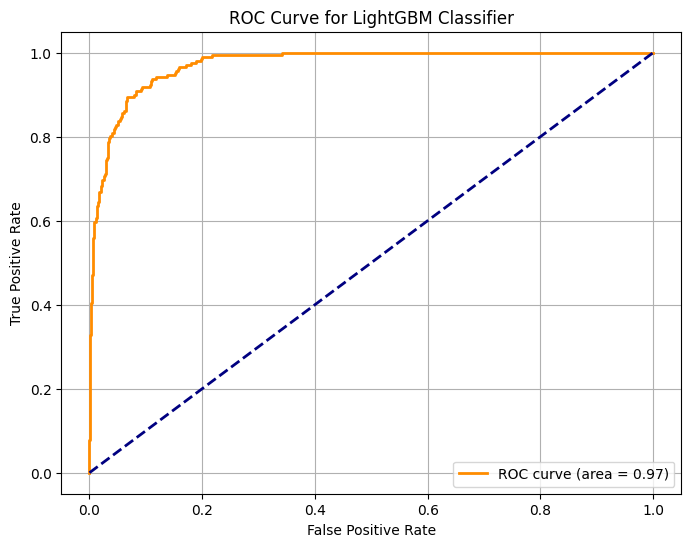

In [98]:
# Train a LightGBM classifier and plot the ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import lightgbm as lgb

# Initialize and train the LightGBM classifier
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LightGBM Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

C:\Users\beego\AppData\Local\Temp\ipykernel_17460\3167411917.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


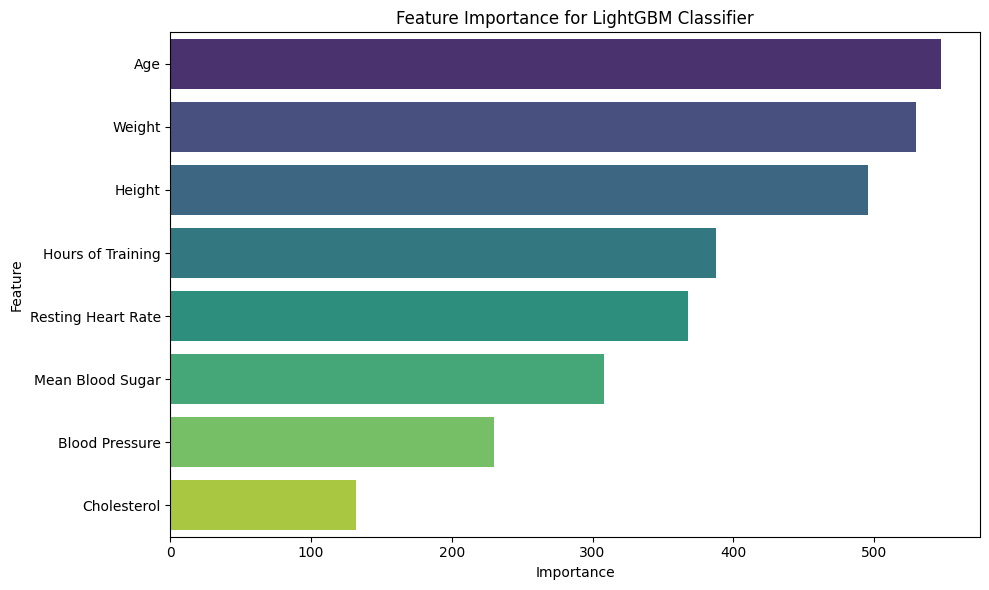

In [99]:
# Display feature importance for the LightGBM model
importances = lgbm.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for LightGBM Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# # Save the DataFrame to a CSV file
# df.to_csv('diabetes_data.csv', index=False)
# print("DataFrame saved to 'diabetes_data.csv'")

DataFrame saved to 'diabetes_data.csv'
